In [35]:
import pandas as pd
import os
import numpy as np
import cv2
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
from sklearn.preprocessing import  StandardScaler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,balanced_accuracy_score,classification_report,ConfusionMatrixDisplay
import xgboost as xgb
import catboost
import joblib

In [2]:
data = pd.read_csv(r'Saved Model\sensor_processed.csv')
# Bước 1: Tiền xử lý dữ liệu
# Lấy các cột đặc trưng và nhãn
features = data.drop(columns=["Time", "Label"])
# features = data.iloc[:,:-1]
labels = data["Label"]

labels = np.where(labels == 20, 0 , labels)
labels = to_categorical(labels, 12)

In [3]:
def display_result(y_test , y_pred) :
    print('Accuracy score : ', accuracy_score(y_test , y_pred) )
    print('Precision score : ', precision_score(y_test , y_pred, average='weighted'))
    print('Recall score : ', recall_score(y_test , y_pred, average='weighted'))
    print('F1 score : ', f1_score(y_test , y_pred, average='weighted'))

def scaled_data(X_test):
    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(X_test)
    return X_test_scaled

X_test_scaled = scaled_data(features)
X_test_scaled

array([[-7.19523220e-01,  2.90429994e-01,  1.08393083e-01, ...,
         9.75485354e-01,  6.07140665e+00,  1.50962415e+00],
       [-7.19523220e-01,  2.88400748e-01,  1.10883916e-01, ...,
         1.22732224e+00,  6.61402520e+00,  1.50962415e+00],
       [-7.19523220e-01,  2.94488487e-01,  1.18356415e-01, ...,
         1.91749735e+00,  7.14962821e+00,  1.50962415e+00],
       ...,
       [ 8.66735967e-01,  1.75757515e+00,  6.01578036e-01, ...,
         7.61272071e-02, -2.76366822e-02, -2.95415696e-01],
       [ 8.70539946e-01,  1.75148741e+00,  6.14032201e-01, ...,
         5.87990811e-02, -6.89311749e-04, -2.95415696e-01],
       [ 8.70539946e-01,  1.75148741e+00,  6.14032201e-01, ...,
         4.28038879e-02, -2.41385214e-02, -2.95415696e-01]])

XGBoost

Accuracy score :  0.9496772743826372
Precision score :  0.9611485452763656
Recall score :  0.9496772743826372
F1 score :  0.9532157216474941


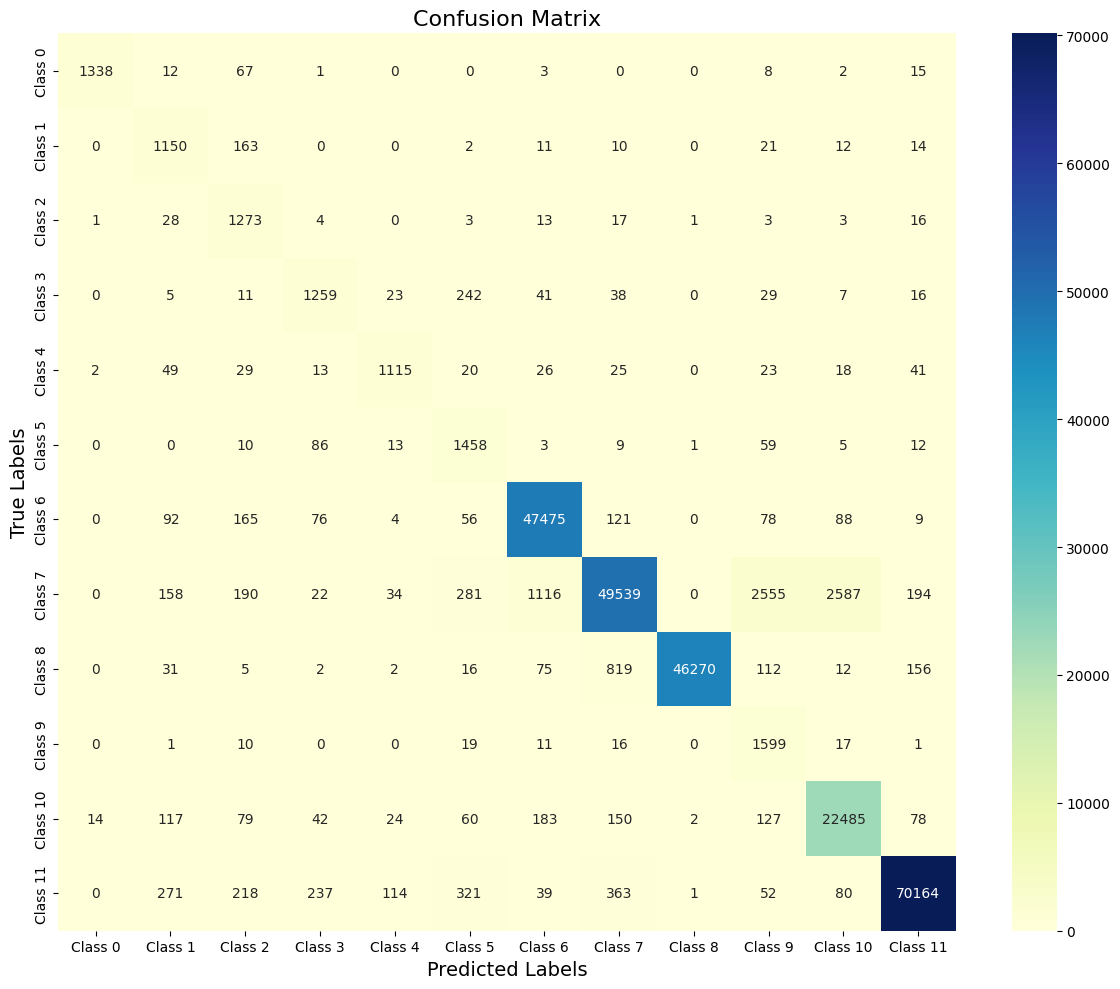

In [ ]:
MODEL_PATH = r'Saved Model\Augment Model\XGB_model.sav'
xgb_model = joblib.load(MODEL_PATH)
dtest = xgb.DMatrix(X_test_scaled)
probs = xgb_model.predict(dtest)
y_pred = np.argmax(probs, axis=1)
y_test = np.argmax(labels, axis=1)
display_result(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, 
            xticklabels=[f"Class {i}" for i in range(cm.shape[1])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])

# Gắn nhãn và tiêu đề
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

Accuracy score :  0.9958700419194619
Precision score :  0.9958368828281813
Recall score :  0.9958700419194619
F1 score :  0.995838368876151


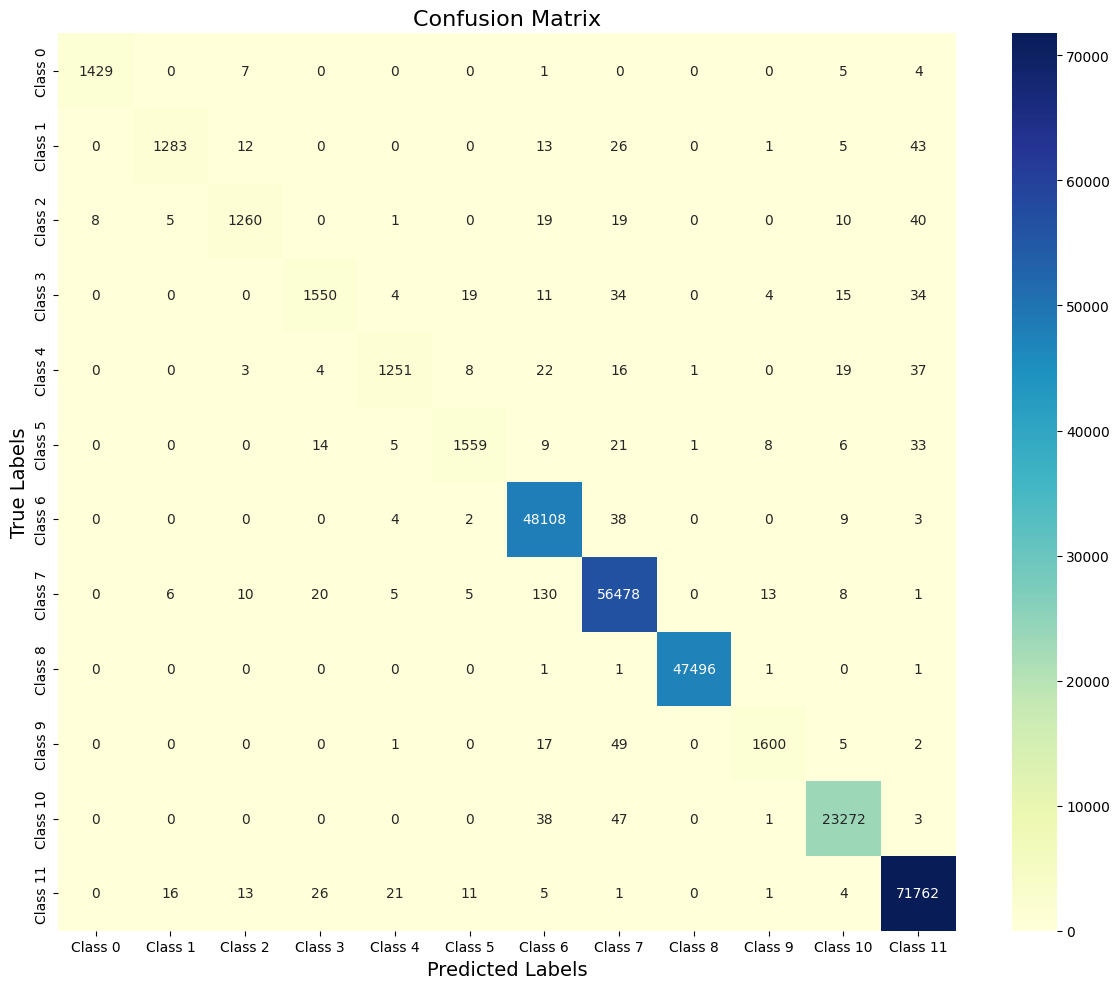

In [6]:
MODEL_PATH = r'Saved Model\Raw Model\XGB_model.sav'
xgb_model = joblib.load(MODEL_PATH)
dtest = xgb.DMatrix(X_test_scaled)
probs = xgb_model.predict(dtest)
y_pred = np.argmax(probs, axis=1)
y_test = np.argmax(labels, axis=1)
display_result(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, 
            xticklabels=[f"Class {i}" for i in range(cm.shape[1])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])

# Gắn nhãn và tiêu đề
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

XGBboost with UPFALL_SMOTE

In [11]:
data = pd.read_csv(r'Saved Model\balanced_data.csv')
features = data.iloc[:,:-1]
labels = data.iloc[:, -1]

labels = np.where(labels == 20, 0 , labels)
labels = to_categorical(labels, 12)

X_test_scaled = scaled_data(features)

Accuracy score :  0.9994306058075888
Precision score :  0.9994307646288791
Recall score :  0.9994306058075888
F1 score :  0.9994304270021396


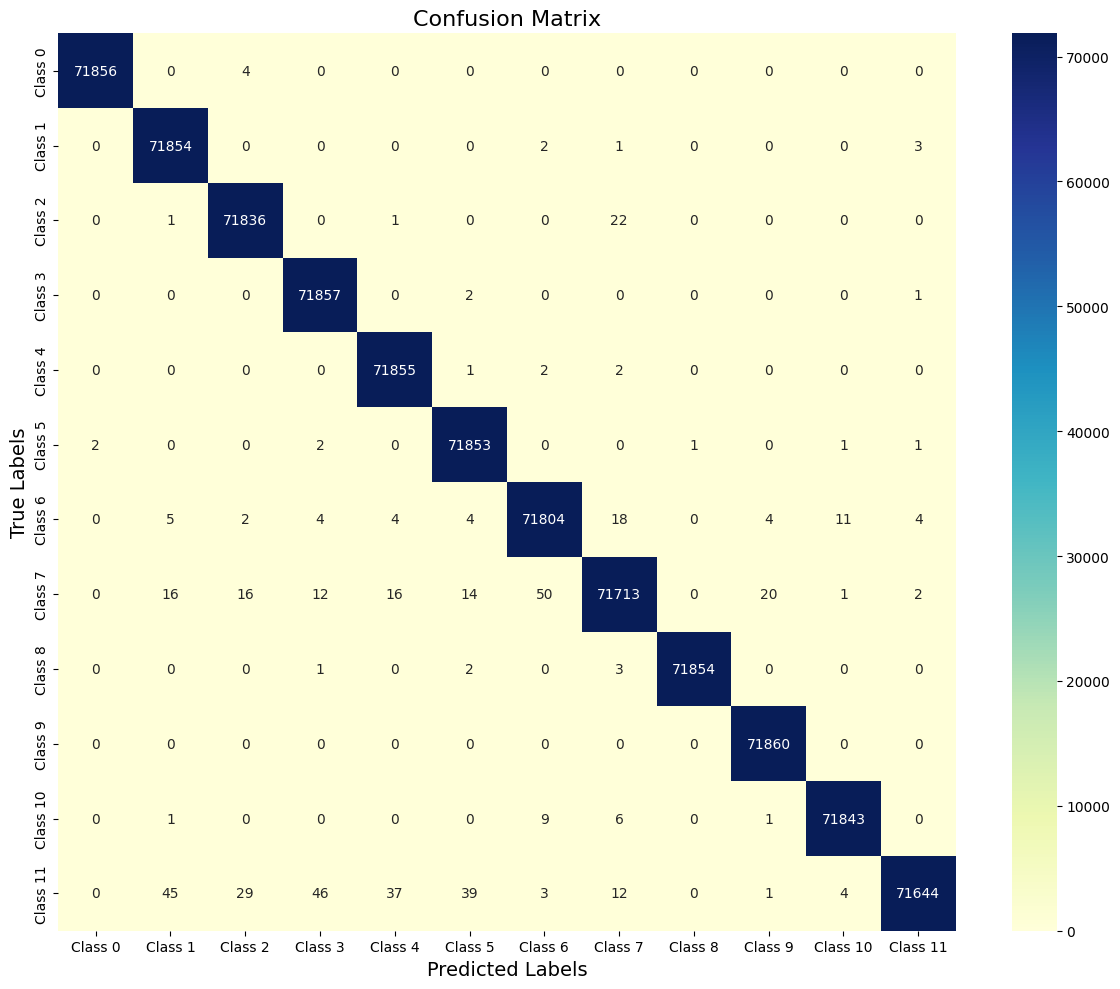

In [12]:
MODEL_PATH = r'Saved Model\Augment Model\XGB_model.sav'
xgb_model = joblib.load(MODEL_PATH)
dtest = xgb.DMatrix(X_test_scaled)
probs = xgb_model.predict(dtest)
y_pred = np.argmax(probs, axis=1)
y_test = np.argmax(labels, axis=1)
display_result(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, 
            xticklabels=[f"Class {i}" for i in range(cm.shape[1])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])

# Gắn nhãn và tiêu đề
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

Accuracy score :  0.7526695426291864
Precision score :  0.8127880985336255
Recall score :  0.7526695426291864
F1 score :  0.7397757866592539


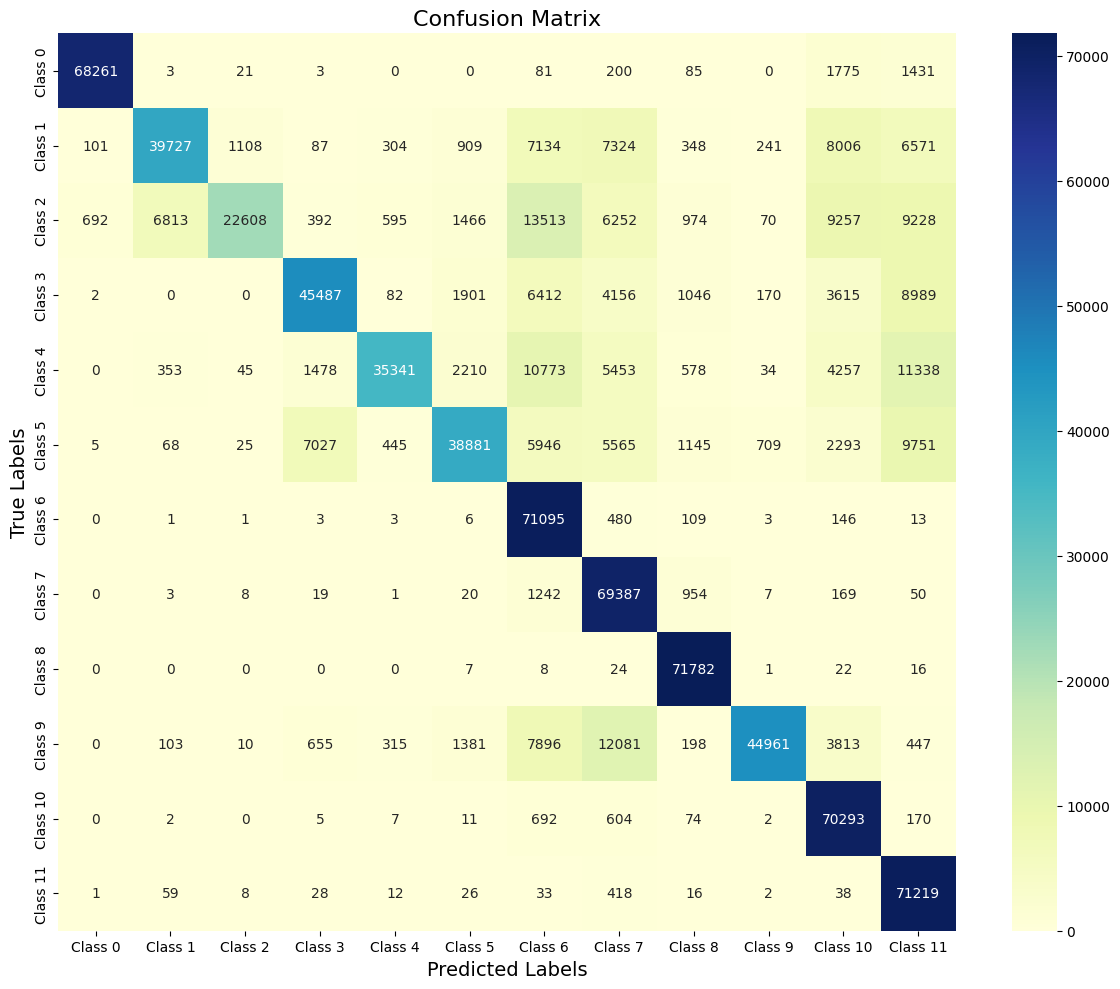

In [13]:
MODEL_PATH = r'Saved Model\Raw Model\XGB_model.sav'
xgb_model = joblib.load(MODEL_PATH)
dtest = xgb.DMatrix(X_test_scaled)
probs = xgb_model.predict(dtest)
y_pred = np.argmax(probs, axis=1)
y_test = np.argmax(labels, axis=1)
display_result(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, 
            xticklabels=[f"Class {i}" for i in range(cm.shape[1])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])

# Gắn nhãn và tiêu đề
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

CATBoost

In [26]:
data = pd.read_csv(r'Saved Model\sensor_processed.csv')
# Bước 1: Tiền xử lý dữ liệu
# Lấy các cột đặc trưng và nhãn
features = data.drop(columns=["Time", "Label"])
# features = data.iloc[:,:-1]
labels = data["Label"]

labels = np.where(labels == 20, 0 , labels)
labels = to_categorical(labels, 12)
print(features.shape[0])
print(len(labels))
X_test_scaled = scaled_data(features)

258114
258114


Accuracy score :  0.9765413731916905
Precision score :  0.9792054856999194
Recall score :  0.9765413731916905
F1 score :  0.9772182711395625


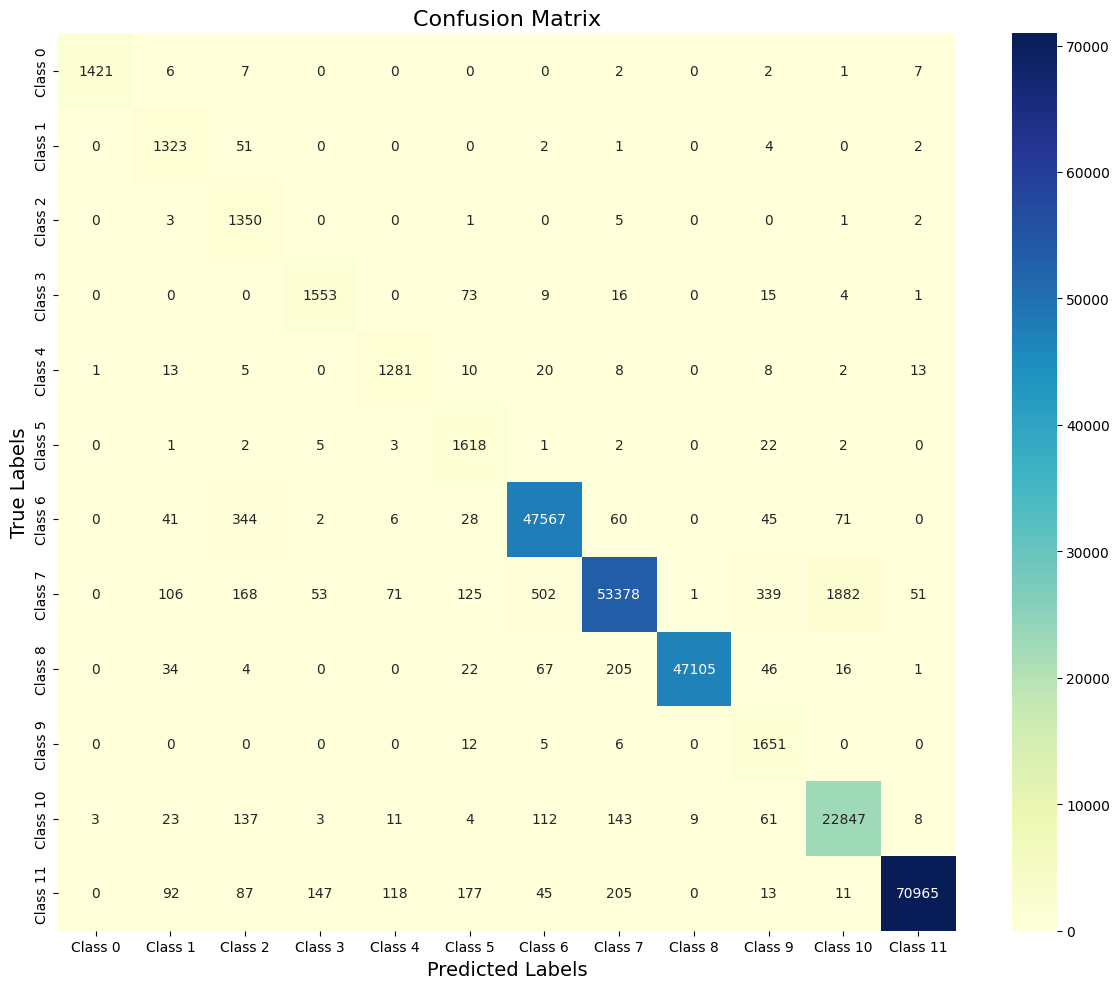

In [28]:
MODEL_PATH = r'Saved Model\Augment Model\Catboost_model.sav'
# Tải mô hình
catboost_model = joblib.load(MODEL_PATH)

# Dự đoán
probs = catboost_model.predict_proba(X_test_scaled)
y_pred = np.argmax(probs, axis=1)
y_test = np.argmax(labels, axis=1)

# Hiển thị kết quả
display_result(y_test, y_pred)

# Tính toán và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, 
            xticklabels=[f"Class {i}" for i in range(cm.shape[1])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])

# Gắn nhãn và tiêu đề
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

Accuracy score :  0.9960250122039099
Precision score :  0.9959895289348143
Recall score :  0.9960250122039099
F1 score :  0.9959866868011704


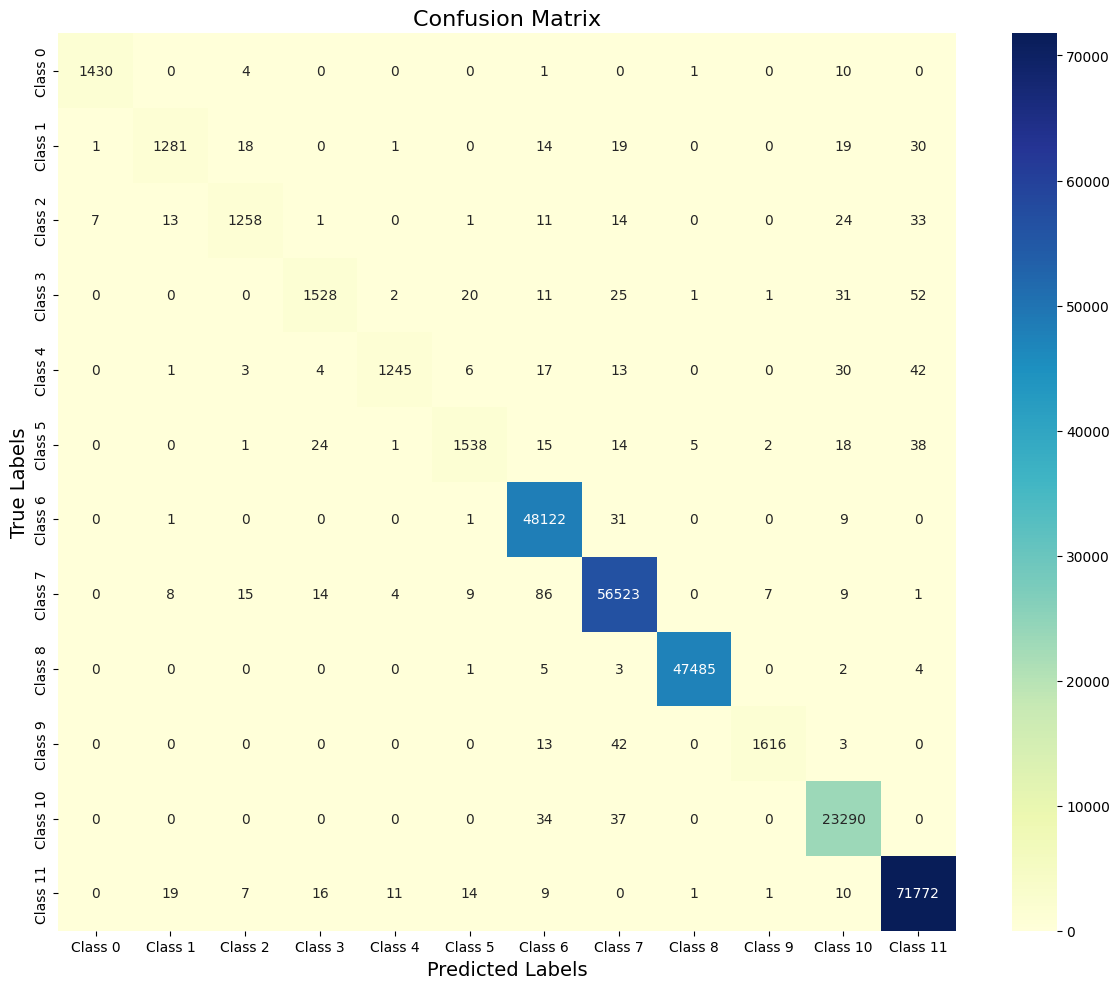

In [29]:
MODEL_PATH = r'Saved Model\Raw Model\Catboost_model.sav'
# Tải mô hình
catboost_model = joblib.load(MODEL_PATH)

# Dự đoán
probs = catboost_model.predict_proba(X_test_scaled)
y_pred = np.argmax(probs, axis=1)
y_test = np.argmax(labels, axis=1)

# Hiển thị kết quả
display_result(y_test, y_pred)

# Tính toán và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, 
            xticklabels=[f"Class {i}" for i in range(cm.shape[1])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])

# Gắn nhãn và tiêu đề
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

CATBoost with UPFALL_SMOTE

In [30]:
data = pd.read_csv(r'Saved Model\balanced_data.csv')
features = data.iloc[:,:-1]
labels = data.iloc[:, -1]

labels = np.where(labels == 20, 0 , labels)
labels = to_categorical(labels, 12)

X_test_scaled = scaled_data(features)

Accuracy score :  0.9995059838575007
Precision score :  0.9995062819563192
Recall score :  0.9995059838575007
F1 score :  0.9995057693581592


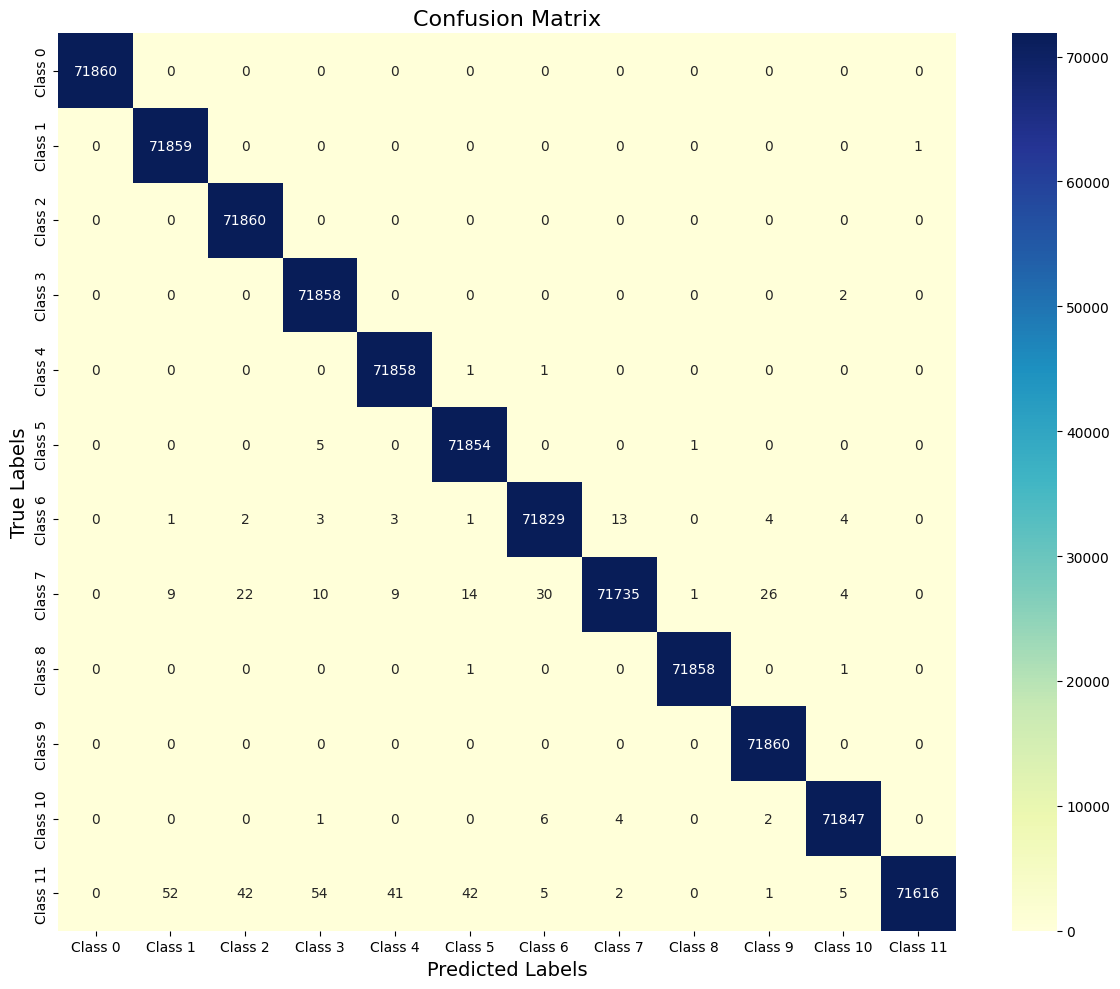

In [31]:
MODEL_PATH = r'Saved Model\Augment Model\Catboost_model.sav'
# Tải mô hình
catboost_model = joblib.load(MODEL_PATH)

# Dự đoán
probs = catboost_model.predict_proba(X_test_scaled)
y_pred = np.argmax(probs, axis=1)
y_test = np.argmax(labels, axis=1)

# Hiển thị kết quả
display_result(y_test, y_pred)

# Tính toán và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, 
            xticklabels=[f"Class {i}" for i in range(cm.shape[1])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])

# Gắn nhãn và tiêu đề
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

Accuracy score :  0.8153771221820206
Precision score :  0.8604979259786072
Recall score :  0.8153771221820206
F1 score :  0.8120699290011841


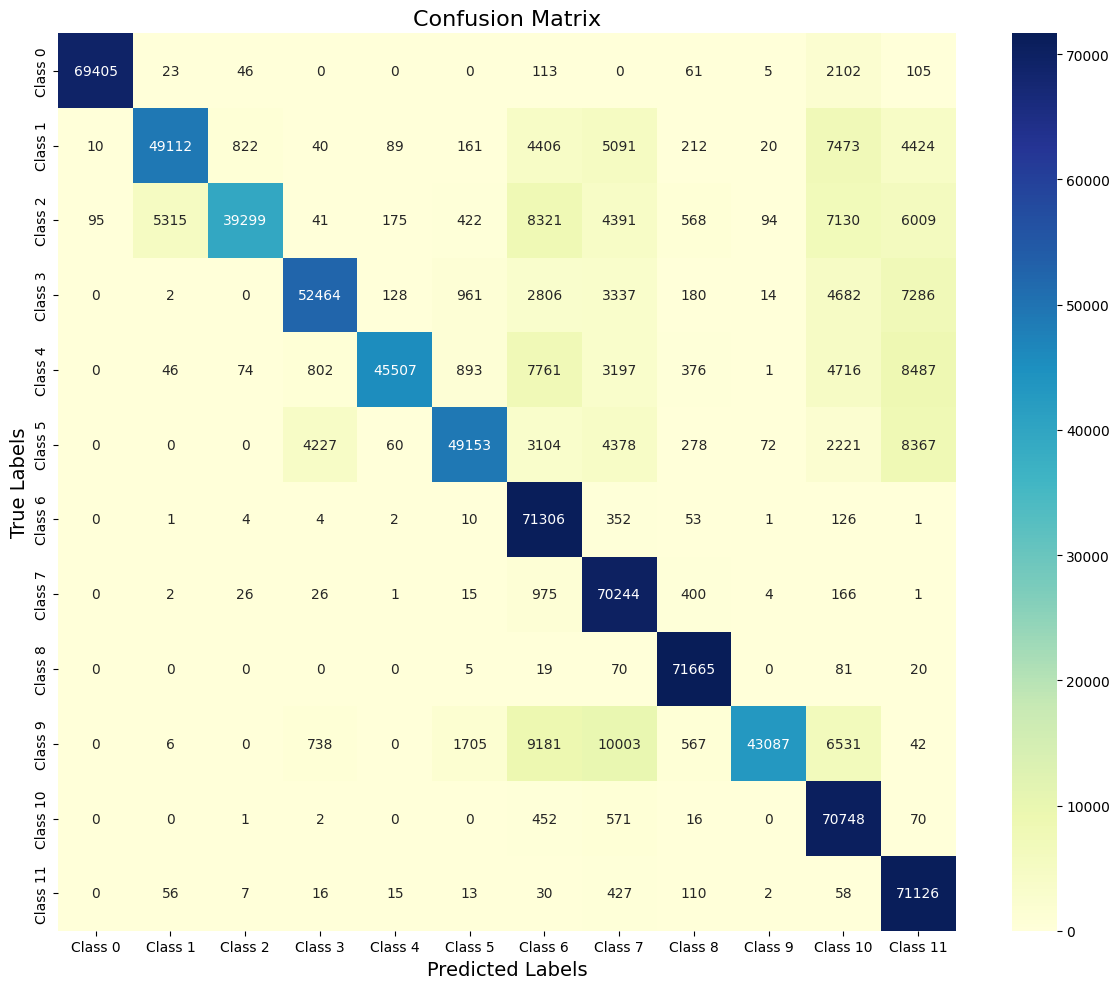

In [32]:
MODEL_PATH = r'Saved Model\Raw Model\Catboost_model.sav'
# Tải mô hình
catboost_model = joblib.load(MODEL_PATH)

# Dự đoán
probs = catboost_model.predict_proba(X_test_scaled)
y_pred = np.argmax(probs, axis=1)
y_test = np.argmax(labels, axis=1)

# Hiển thị kết quả
display_result(y_test, y_pred)

# Tính toán và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, 
            xticklabels=[f"Class {i}" for i in range(cm.shape[1])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])

# Gắn nhãn và tiêu đề
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

MLP

In [33]:
data = pd.read_csv(r'Saved Model\sensor_processed.csv')
# Bước 1: Tiền xử lý dữ liệu
# Lấy các cột đặc trưng và nhãn
features = data.drop(columns=["Time", "Label"])
# features = data.iloc[:,:-1]
labels = data["Label"]

labels = np.where(labels == 20, 0 , labels)
labels = to_categorical(labels, 12)
print(features.shape[0])
print(len(labels))
X_test_scaled = scaled_data(features)

258114
258114


8067/8067 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
Accuracy score :  0.9871568376763755
Precision score :  0.9878440294028377
Recall score :  0.9871568376763755
F1 score :  0.987243742873066


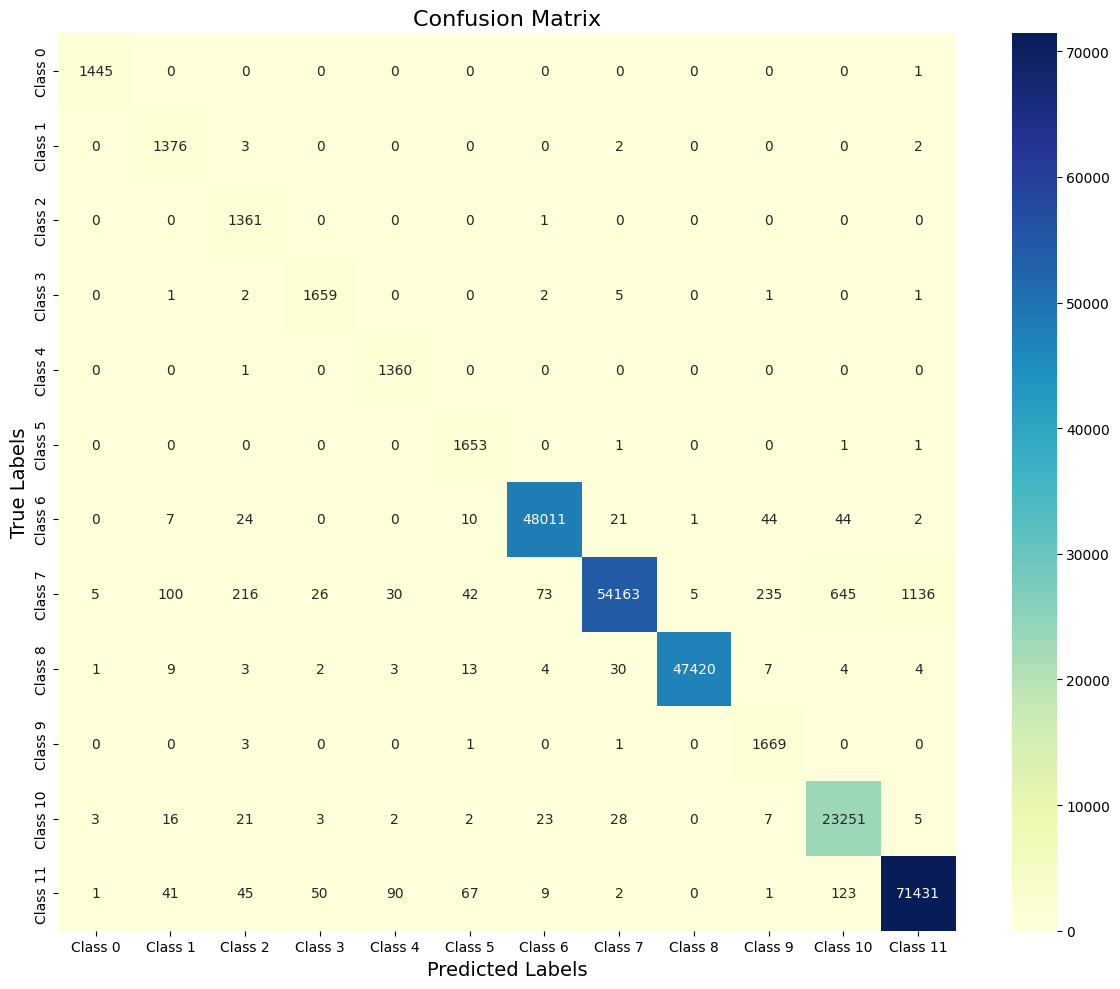

In [36]:
# Tải mô hình MLP
MLP_MODEL_PATH = r'Saved Model\Augment Model\MLP_csv.hdf5'
mlp_model = load_model(MLP_MODEL_PATH)

# Dự đoán với MLP
probs = mlp_model.predict(X_test_scaled)  # Trả về xác suất
y_pred = np.argmax(probs, axis=1)         # Chọn nhãn có xác suất cao nhất
y_test = np.argmax(labels, axis=1)        # Nhãn thực tế

# Hiển thị kết quả
display_result(y_test, y_pred)

# Tính toán và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, 
            xticklabels=[f"Class {i}" for i in range(cm.shape[1])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])

# Gắn nhãn và tiêu đề
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

c:\Users\Duyen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8067/8067 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
Accuracy score :  0.9954012568090068
Precision score :  0.9953931166286004
Recall score :  0.9954012568090068
F1 score :  0.9953922962138839


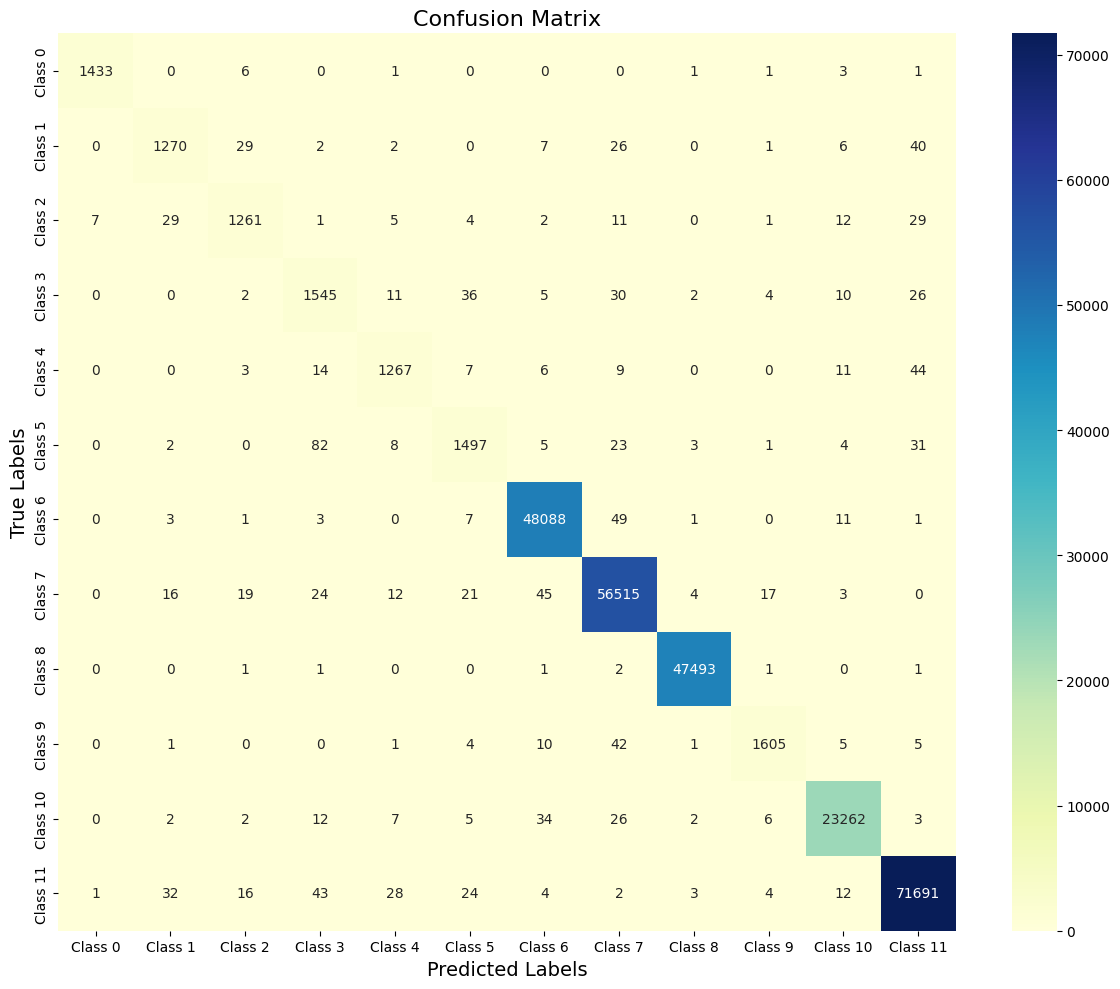

In [37]:
# Tải mô hình MLP
MLP_MODEL_PATH = r'Saved Model\Raw Model\MLP_csv.hdf5'
mlp_model = load_model(MLP_MODEL_PATH)

# Dự đoán với MLP
probs = mlp_model.predict(X_test_scaled)  # Trả về xác suất
y_pred = np.argmax(probs, axis=1)         # Chọn nhãn có xác suất cao nhất
y_test = np.argmax(labels, axis=1)        # Nhãn thực tế

# Hiển thị kết quả
display_result(y_test, y_pred)

# Tính toán và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, 
            xticklabels=[f"Class {i}" for i in range(cm.shape[1])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])

# Gắn nhãn và tiêu đề
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

MPL with UPFALL_SMOTE

In [39]:
data = pd.read_csv(r'Saved Model\balanced_data.csv')
# Bước 1: Tiền xử lý dữ liệu
# Lấy các cột đặc trưng và nhãn
features = data.iloc[:,:-1]
labels = data.iloc[:, -1]

labels = np.where(labels == 20, 0 , labels)
labels = to_categorical(labels, 12)
print(features.shape[0])
print(len(labels))
X_test_scaled = scaled_data(features)

862320
862320


26948/26948 ━━━━━━━━━━━━━━━━━━━━ 27s 994us/step
Accuracy score :  0.9995454123759161
Precision score :  0.9995454852985859
Recall score :  0.9995454123759161
F1 score :  0.9995453231568312


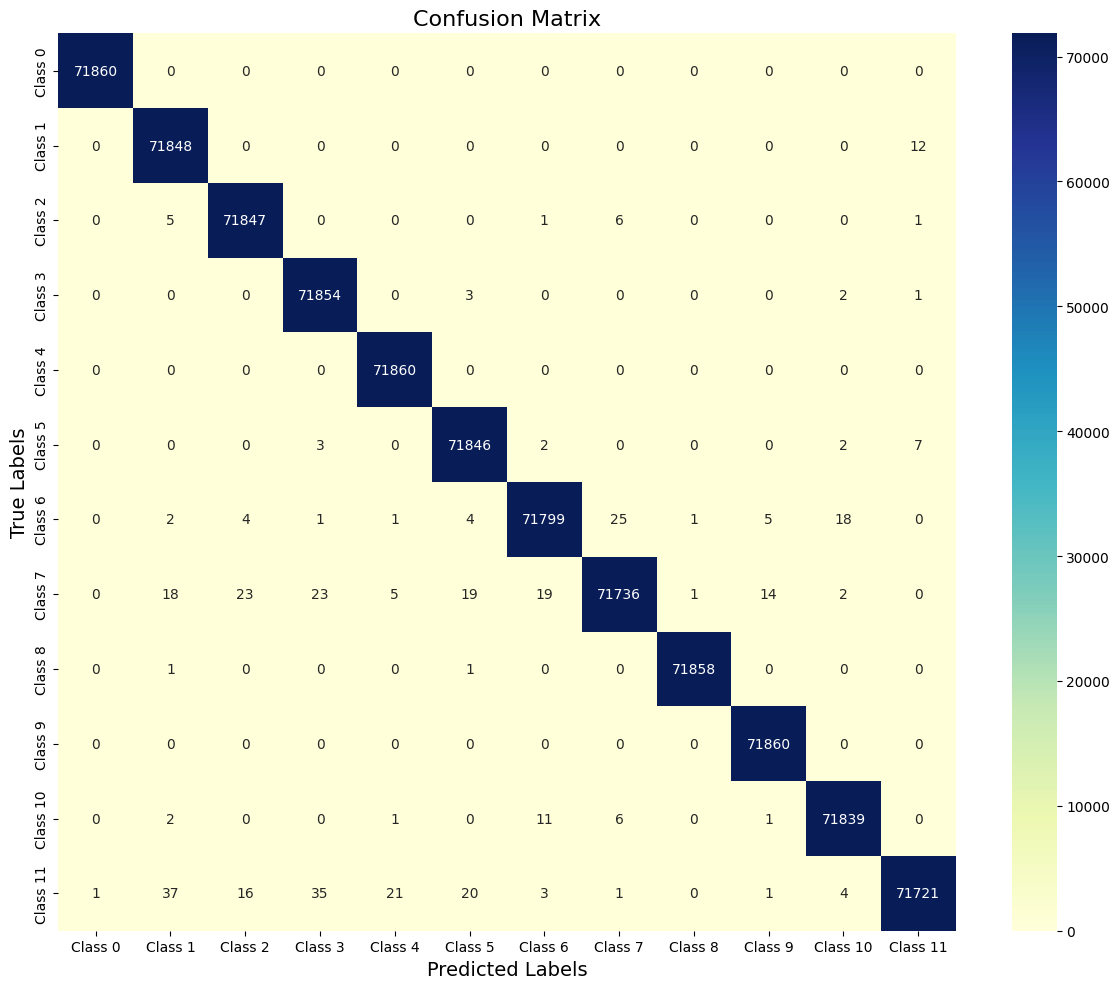

In [40]:
# Tải mô hình MLP
MLP_MODEL_PATH = r'Saved Model\Augment Model\MLP_csv.hdf5'
mlp_model = load_model(MLP_MODEL_PATH)

# Dự đoán với MLP
probs = mlp_model.predict(X_test_scaled)  # Trả về xác suất
y_pred = np.argmax(probs, axis=1)         # Chọn nhãn có xác suất cao nhất
y_test = np.argmax(labels, axis=1)        # Nhãn thực tế

# Hiển thị kết quả
display_result(y_test, y_pred)

# Tính toán và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, 
            xticklabels=[f"Class {i}" for i in range(cm.shape[1])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])

# Gắn nhãn và tiêu đề
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

c:\Users\Duyen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26948/26948 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step
Accuracy score :  0.9351412468689118
Precision score :  0.9424562672381225
Recall score :  0.9351412468689118
F1 score :  0.9355292528846959


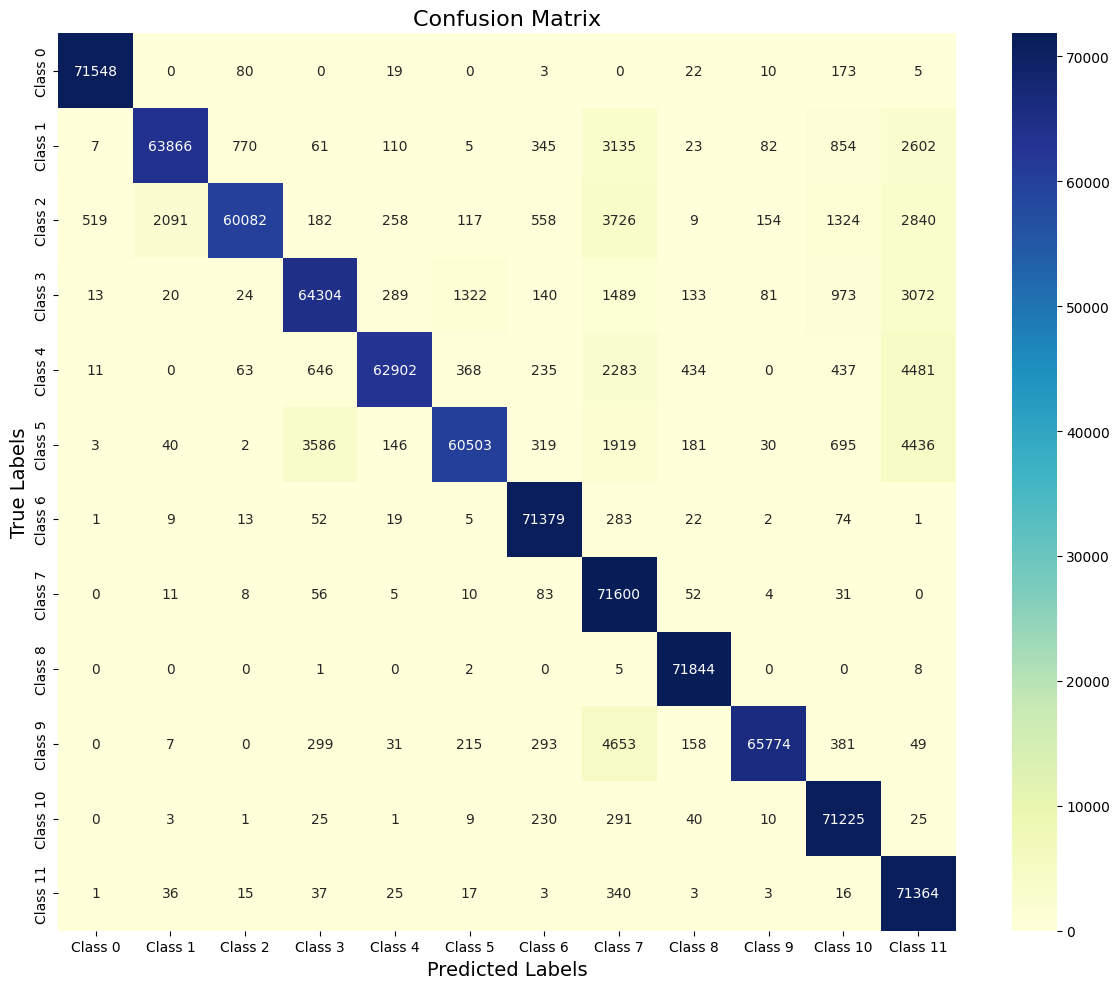

In [41]:
# Tải mô hình MLP
MLP_MODEL_PATH = r'Saved Model\Raw Model\MLP_csv.hdf5'
mlp_model = load_model(MLP_MODEL_PATH)

# Dự đoán với MLP
probs = mlp_model.predict(X_test_scaled)  # Trả về xác suất
y_pred = np.argmax(probs, axis=1)         # Chọn nhãn có xác suất cao nhất
y_test = np.argmax(labels, axis=1)        # Nhãn thực tế

# Hiển thị kết quả
display_result(y_test, y_pred)

# Tính toán và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, 
            xticklabels=[f"Class {i}" for i in range(cm.shape[1])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])

# Gắn nhãn và tiêu đề
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()